## LIBRERIAS

In [97]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pandas_datareader import data as pdr
import yfinance as yf

In [98]:
# opciones del notebook

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

## LECTURA DE DATOS

In [99]:
activos_nasdaq = pd.read_csv('./data/activos_nasdaq.csv')
activos_nasdaq['Date'] = pd.to_datetime(activos_nasdaq['Date'], format="%Y-%m-%d")
activos_nasdaq = activos_nasdaq.set_index('Date')
activos_nasdaq = activos_nasdaq.iloc[:,:-1]
activos_nasdaq

MELI UW Equity  CDW UW Equity  AMZN UW Equity  ALXN UW Equity  \
Date                                                                        
2015-04-29      126.692297      34.195179      380.471212      153.838431   
2015-04-30      126.120753      33.955928      373.745599      149.957247   
2015-05-01      128.796820      34.266068      374.711465      152.854843   
2015-05-04      134.928736      34.398986      374.862104      151.791505   
2015-05-05      132.199502      34.443291      373.222791      149.354689   
2015-05-06      131.596944      34.239485      371.370811      137.356691   
2015-05-07      128.575291      32.759673      378.264786      144.401306   
2015-05-08      129.931047      32.520422      384.299229      144.454473   
2015-05-11      129.532296      32.529283      383.554893      142.699965   
2015-05-12      129.080377      32.724228      381.933302      142.735410   
2015-05-13      128.185401      32.777395      378.255925      141.255598   
2015-05-14      130.072826      33.114119      383.049807      143.275940   
2015-05-15      129.780408      33.300203      377.485005      142.274630   
2015-05-18      130.985524      33.264758      376.811557      144.578529   
2015-05-19      129.000627      32.582450      373.683571      143.515191   
2015-05-20      130.347522      32.538144      375.588718      145.712756   
2015-05-21      132.040001      32.874868      382.473832      149.372411   
2015-05-22      130.684245      32.812840      378.929372      152.358619   
2015-05-25      130.684245      32.812840      378.929372      152.358619   
2015-05-26      129.142405      32.272310      377.015364      147.041929   
2015-05-27      129.753824      32.671061      382.287748      148.973660   
2015-05-28      129.815853      32.741951      377.990090      147.263458   
2015-05-29      128.601875      32.874868      380.347156      145.181087   
2015-06-01      127.317008      32.786256      381.844691      146.014035   
2015-06-02      126.723311      32.679922      381.906719      145.243115   
2015-06-03      127.130924      32.759673      386.868963      143.134161   
2015-06-04      126.971423      32.325476      381.720634      140.945457   
2015-06-05      128.433513      32.414088      378.326814      142.008795   
2015-06-08      126.430893      32.254587      375.269717      141.229014   
2015-06-09      126.944840      32.414088      377.024225      140.927735   
2015-06-10      128.885432      32.874868      381.711773      150.533222   
2015-06-11      125.323249      32.671061      383.661226      149.549634   
2015-06-12      127.299286      32.538144      380.958575      149.788885   
2015-06-15      125.801751      32.422949      375.420357      153.492846   
2015-06-16      127.170799      32.281171      378.601510      156.966417   
2015-06-17      126.998007      32.515991      379.088873      159.332344   
2015-06-18      128.894293      33.176147      389.350085      163.054027   
2015-06-19      130.400688      32.609033      385.389151      163.399612   
2015-06-22      130.010798      32.759673      386.603128      166.802294   
2015-06-23      133.794509      32.874868      395.198444      169.177082   
2015-06-24      132.155196      32.352060      390.634952      163.913559   
2015-06-25      132.598254      32.316615      389.979227      164.728785   
2015-06-26      130.905774      31.279861      388.206996      163.443918   
2015-06-29      125.057415      30.641858      380.905409      157.515808   
2015-06-30      125.562500      30.376023      384.653675      160.183015   
2015-07-01      125.349833      30.703886      387.577855      162.921110   
2015-07-02      122.913016      30.526663      387.861412      164.126227   
2015-07-03      122.913016      30.526663      387.861412      164.126227   
2015-07-06      120.502783      30.234245      386.381600      165.030064   
2015-07-07      119.882503      30.473496      386.984158      165.995929   
2015-07-

In [100]:
indicadores = pd.read_excel('./data/Datos Acciones renta variable.xlsx', sheet_name='Hoja2')
indicadores = indicadores.set_index('Ticker')
len(indicadores)

44

In [101]:
indicadores.head()

Price  OPER_MARGIN  RETURN_ON_INV_CAPITAL  ROC_WACC_RATIO  \
Ticker                                                                        
MELI UW Equity   866.93    -6.669863              -7.835844       -0.466724   
CDW UW Equity    125.34     6.286462              19.492927        2.192339   
AMZN UW Equity  2483.00     5.183551               4.500000        1.299721   
ALXN UW Equity   115.21    42.483621              17.732685        1.980240   
BMRN UW Equity   105.80    -5.895198               2.837115        0.395703   

                OPERATING_ROIC  OPER_INC_TO_TOT_DEBT   CUR_MKT_CAP PE_RATIO  \
Ticker                                                                        
MELI UW Equity       -5.466515             -0.150538  4.309505e+10        -   
CDW UW Equity        25.143969              0.325888  1.783815e+10  23.6838   
AMZN UW Equity       11.393006              0.187541  1.238461e+12  118.634   
ALXN UW Equity        1.420000              0.767510  2.544153e+10  12.0687   
BMRN UW Equity        1.500000             -0.110438  1.913254e+10  133.534   

               PX_TO_BOOK_RATIO PX_TO_CASH_FLOW EPS_GROWTH DVD_PAYOUT_RATIO  \
Ticker                                                                        
MELI UW Equity          23.0879         189.608   -330.771                -   
CDW UW Equity           20.0471         18.0812    19.2488           24.912   
AMZN UW Equity          18.9824           30.95    13.4429                0   
ALXN UW Equity          2.16831         11.6339    2977.14                0   
BMRN UW Equity          5.90273         215.855    70.4545                -   

                Unnamed: 13  EQY_REC_CONS  TOT_ANALYST_REC  TOT_BUY_REC  \
Ticker                                                                    
MELI UW Equity          NaN      3.869565               23           12   
CDW UW Equity           NaN      3.800000               10            5   
AMZN UW Equity          NaN      4.745454               55           50   
ALXN UW Equity          NaN      4.360000               25           17   
BMRN UW Equity          NaN      4.538462               26           20   

                TOT_SELL_REC  Unnamed: 18  TWITTER_SENTIMENT  NEWS_SENTIMENT  
Ticker                                                                        
MELI UW Equity             2          NaN           0.415005       -0.342350  
CDW UW Equity              1          NaN           0.297486        0.009725  
AMZN UW Equity             1          NaN          -0.033902        0.449071  
ALXN UW Equity             0          NaN           0.197014       -0.402494  
BMRN UW Equity             0          NaN           0.118857       -0.212550

In [102]:
ratios = indicadores.loc[activos_nasdaq.columns, ['OPER_MARGIN','RETURN_ON_INV_CAPITAL']]
ratios

OPER_MARGIN  RETURN_ON_INV_CAPITAL
MELI UW Equity     -6.669863              -7.835844
CDW UW Equity       6.286462              19.492927
AMZN UW Equity      5.183551               4.500000
ALXN UW Equity     42.483621              17.732685
BMRN UW Equity     -5.895198               2.837115
GOOG UW Equity     21.148915              14.847055
VRSN UW Equity     65.450396             214.100405
CSCO UW Equity     27.394806              18.245801
MSFT UW Equity     34.136980              23.872039
EBAY UW Equity     21.490741              18.285513
INCY UW Equity     18.622088             -18.982948
BKNG UW Equity     35.477234              24.351290
ILMN UW Equity     27.801298              12.982072
JD UW Equity        1.559206               4.930603
GOOGL UW Equity    21.148915              12.450000
NFLX UW Equity     12.920204              13.213509
ADBE UW Equity     29.254625              22.460145
AMGN UW Equity     41.409126              19.380603
ADSK UW Equity     10.475521              17.440444
CDNS UW Equity     21.050036              42.803902
REGN UW Equity     28.102348              18.844371
ATVI UW Equity     24.764987              10.530186
EXPE UW Equity      7.483219              -4.682372
CERN UW Equity     10.551755               8.443229
NTES UW Equity     23.278839              14.152050
SNPS UW Equity     15.479868              10.186540
SPLK UW Equity    -12.172361             -12.218259
EA UW Equity       26.097165              45.649087
FISV UW Equity     15.794640               4.778274
ANSS UW Equity     33.976035              19.320000
FB UW Equity       33.927889              19.456558
GILD UW Equity     19.096619               9.565791
SGEN UW Equity    -24.058239             -18.627545
TTWO UW Equity     13.767275              16.595943
BIIB UW Equity     48.982118              31.827094
VRTX UW Equity     28.768136              23.203463
PAYX UW Equity     36.349901              32.272920
INTU UW Equity     27.329009              24.707147
TCOM UW Equity     14.131105              -4.373624
BIDU UW Equity      5.871729               1.261849
CTXS UW Equity     17.807892              34.217258

In [103]:
# me quedo unicamente con las empresas de las que tengo datos de los ratios

precios = activos_nasdaq.loc[:,ratios.index]

precios.head()

MELI UW Equity  CDW UW Equity  AMZN UW Equity  ALXN UW Equity  \
Date                                                                        
2015-04-29      126.692297      34.195179      380.471212      153.838431   
2015-04-30      126.120753      33.955928      373.745599      149.957247   
2015-05-01      128.796820      34.266068      374.711465      152.854843   
2015-05-04      134.928736      34.398986      374.862104      151.791505   
2015-05-05      132.199502      34.443291      373.222791      149.354689   

            BMRN UW Equity  GOOG UW Equity  VRSN UW Equity  CSCO UW Equity  \
Date                                                                         
2015-04-29      102.071591      486.548043       56.835418       25.741642   
2015-04-30       99.289190      476.145052       56.277166       25.546696   
2015-05-01      102.718455      476.641277       56.844279       25.812531   
2015-05-04      103.072901      479.193288       57.083531       25.847976   
2015-05-05      100.946225      470.349860       55.692330       25.599863   

            MSFT UW Equity  EBAY UW Equity  INCY UW Equity  BKNG UW Equity  \
Date                                                                         
2015-04-29       43.472804       21.959082       90.091316     1106.323481   
2015-04-30       43.100635       21.727895       86.094937     1096.842050   
2015-05-01       43.113927       22.113887       87.087386     1116.885973   
2015-05-04       42.746189       22.044858       89.497618     1123.115361   
2015-05-05       42.179076       21.606675       86.396216     1119.446845   

            ILMN UW Equity  JD UW Equity  GOOGL UW Equity  NFLX UW Equity  \
Date                                                                        
2015-04-29      165.260454     30.305134       497.456119       71.249852   
2015-04-30      163.266695     29.738021       486.273347       70.446145   
2015-05-01      169.451778     29.711437       488.391162       70.513490   
2015-05-04      168.051716     30.384885       489.879835       70.243225   
2015-05-05      165.738956     29.862077       481.200339       71.591892   

            ADBE UW Equity  AMGN UW Equity  ADSK UW Equity  CDNS UW Equity  \
Date                                                                         
2015-04-29       67.920717      142.646798       52.759289       16.774158   
2015-04-30       67.397909      139.926425       50.357917       16.526045   
2015-05-01       67.725772      142.097407       51.026934       16.800741   
2015-05-04       67.211825      143.648108       51.177574       16.720991   
2015-05-05       66.458628      141.282181       50.278167       16.468448   

            REGN UW Equity  ATVI UW Equity  EXPE UW Equity  CERN UW Equity  \
Date                                                                         
2015-04-29      416.208232       20.549008       85.297433       64.712981   
2015-04-30      405.362184       20.216715       83.498620       63.631921   
2015-05-01      417.501960       20.424952       90.109038       63.897755   
2015-05-04      420.169166       20.549008       89.409007       64.739564   
2015-05-05      412.486548       20.123672       87.521582       63.871172   

            NTES UW Equity  SNPS UW Equity  SPLK UW Equity  EA UW Equity  \
Date                                                                       
2015-04-29      110.764379       42.090464       60.184933     51.939633   
2015-04-30      113.591086       41.541073       58.789302     51.474422   
2015-05-01      111.996079       41.727157       59.112734     52.573205   
2015-05-04      113.405002       41.851213       59.520347     52.555483   
2015-05-05      111.025783       41.310683       58.244341     52.422565   

            FISV UW Equity  ANSS UW Equity  FB UW Equity  GILD UW Equity  \
Date                                                                       
2015-04-29       34.921793       76.959091     71.301246   

## RISK PREMIA QUALITY

Es una estrategia basada en la salud y calidad de los balances de las compañías. Se toman un conjunto de ratios contables y financieros de las empresas, en este caso cogeremos:

* Margen operativo: representa la relación entre los ingresos por ventas y las venta netas. 
* ROIC/WACC: el WACC es el promedio del coste del capital, para que una empresa o proyecto se considere rentable, el cociente ha de ser mayor que 1.
* Ratio de cobertura de deuda: es una medida del _cash flow_ disponible para el cumplimiento de las obligaciones de pago. Este rario da una medida de la capaidad de pago de la empresa para un cierto nivel de ingresos.

Definimos la función para generar el ranking de las empresas y los ratios.

In [104]:
def get_rank(df, ratios= ratios.columns):
    '''
        df = dataframe que contiene las cotizaciones de los activos
        ratios = lista de string con los nombres de los ratios
        ------------------------------------------------------------------------
        total = dataframe que devuelve el ranking de cada activo para cada periodo
    '''
    
    total = pd.DataFrame() # Dataframe auxiliar que devolvera los resultados
    
    # itero por los ratios, habra tantos ranking como ratios
    for i in ratios:
        
        # Jerarquizo los valores
        rank = df[i].rank(ascending = False)
        # guardo el ranking como dataframe
        rank = pd.DataFrame(rank, columns = [i])
        # concateno con el total
        total = pd.concat([total,rank], axis = 1)
    
    return total

Por defecto, divideremos el conjunto de acciones en 3 grupos:
* Los 10 mejores valores donde adoptaremos posiciones largas.
* Los 10 peores valores donde adoptaremos posiciones cortas.
* 11 valores neutros donde no se no se adopta posición.

Estos valores dada la codificación realizada se pueden cambiar en cualquier momento, así como el peso de nuestra inversión atribuido a cada grupo. Por defecto daremos el mismo peso a cada uno de los ratios.

In [105]:
def get_weights(df, long_values=20, short_values=20, long_weight=0.3, short_weight=-0.3, 
                ratio_weights=[0.5,0.5]):
    '''
        df = dataframe que contiene los ranking de los activos para cada uno de los periodos de tiempo
        long_values = nº de valores en largo
        short_values = nº de valores en corto
        long_weight = peso de los valores en largo
        short_weight = peso de los valores en corto
        ratio_weights = lista con los pesos de cada uno de los ratios
        ------------------------------------------------------------------------------------------------
        copia = Devuelve el dataframe con los pesos de cada uno de los activos por periodo y total
    '''
    # hago una copia para no tocar el original
    copia = df.copy()
    
    # el peso a corto tienen que ser negativo obligatoriamente, la cartera
    # ha de ser market neutral
    if short_weight > 0:
        
        short_weight = -short_weight
    
    # itero por las columnas y calculo los pesos de ratio. Los pesos se calculan como weight/nº de valores.
    for col in copia.columns:
        copia[col] = np.where(copia[col] <= long_values, (long_weight/long_values), 
                                np.where(copia[col] >= copia.shape[0] - short_values, (short_weight/short_values), 0))
    
    # multiplico los resultados obtenidos anteriormente por los pesos que se hayan introducido de cada ratio 
    copia['Peso Total'] = copia.mul(ratio_weights).sum(axis=1)
    
    return copia

Generamos también una función que pasadas las cotizaciones y los pesos, devuelve los resultados de la estrategia _Risk Premia Quality._

In [106]:
def risk_premia_quality(prices, weights):
    '''
        prices = dataframe que contiene las cotizaciones diarias de los activos
        weights = pesos de los activos para cada uno de los ratios y en total
        -----------------------------------------------------------------------------------
        final = resultado de la estrategia
    '''
    
    # calculo las rentabilidades diarias
    returns = prices.pct_change().dropna()
    
    # genero los resultados como un indice de base 100
    resultados = [100]
    
    # cojo los pesos totales de la matriz de pesos
    pesos = weights.iloc[:,-1]
    
    # voy calculando los resultados como el anterior mas 1 por la rentabilidad que se obtienen diariamente de las
    # distintas acciones y sus pesos
    for i in range(1, len(returns)):
        
        value = resultados[i-1] * (1 + (returns.iloc[i] * pesos).sum())
        
        resultados.append(value)
    
    # meto en un dataframe para devovler el resultado final y asigno las fechas coo indice
    final = pd.DataFrame(resultados, columns=['Risk Premia Quality'])  
    final.set_index(returns.index, inplace=True)
        
    return final

Comenzamos generando el ranking de los ratios.

In [107]:
ranking = get_rank(ratios)
ranking

OPER_MARGIN  RETURN_ON_INV_CAPITAL
MELI UW Equity          39.0                   38.0
CDW UW Equity           34.0                   12.0
AMZN UW Equity          36.0                   33.0
ALXN UW Equity           3.0                   19.0
BMRN UW Equity          38.0                   34.0
GOOG UW Equity          20.5                   22.0
VRSN UW Equity           1.0                    1.0
CSCO UW Equity          14.0                   18.0
MSFT UW Equity           7.0                    9.0
EBAY UW Equity          19.0                   17.0
INCY UW Equity          24.0                   41.0
BKNG UW Equity           6.0                    8.0
ILMN UW Equity          13.0                   25.0
JD UW Equity            37.0                   31.0
GOOGL UW Equity         20.5                   26.0
NFLX UW Equity          30.0                   24.0
ADBE UW Equity          10.0                   11.0
AMGN UW Equity           4.0                   14.0
ADSK UW Equity          32.0                   20.0
CDNS UW Equity          22.0                    3.0
REGN UW Equity          12.0                   16.0
ATVI UW Equity          17.0                   27.0
EXPE UW Equity          33.0                   37.0
CERN UW Equity          31.0                   30.0
NTES UW Equity          18.0                   23.0
SNPS UW Equity          27.0                   28.0
SPLK UW Equity          40.0                   39.0
EA UW Equity            16.0                    2.0
FISV UW Equity          26.0                   32.0
ANSS UW Equity           8.0                   15.0
FB UW Equity             9.0                   13.0
GILD UW Equity          23.0                   29.0
SGEN UW Equity          41.0                   40.0
TTWO UW Equity          29.0                   21.0
BIIB UW Equity           2.0                    6.0
VRTX UW Equity          11.0                   10.0
PAYX UW Equity           5.0                    5.0
INTU UW Equity          15.0                    7.0
TCOM UW Equity          28.0                   36.0
BIDU UW Equity          35.0                   35.0
CTXS UW Equity          25.0                    4.0

A continuación, calculamos el peso total de cada uno de los activos mediante la media ponderada de cada ratio.

In [108]:
pesos = get_weights(ranking)
pesos

OPER_MARGIN  RETURN_ON_INV_CAPITAL  Peso Total
MELI UW Equity        -0.015                 -0.015     -0.0150
CDW UW Equity         -0.015                  0.015      0.0000
AMZN UW Equity        -0.015                 -0.015     -0.0150
ALXN UW Equity         0.015                  0.015      0.0150
BMRN UW Equity        -0.015                 -0.015     -0.0150
GOOG UW Equity         0.000                 -0.015     -0.0075
VRSN UW Equity         0.015                  0.015      0.0150
CSCO UW Equity         0.015                  0.015      0.0150
MSFT UW Equity         0.015                  0.015      0.0150
EBAY UW Equity         0.015                  0.015      0.0150
INCY UW Equity        -0.015                 -0.015     -0.0150
BKNG UW Equity         0.015                  0.015      0.0150
ILMN UW Equity         0.015                 -0.015      0.0000
JD UW Equity          -0.015                 -0.015     -0.0150
GOOGL UW Equity        0.000                 -0.015     -0.0075
NFLX UW Equity        -0.015                 -0.015     -0.0150
ADBE UW Equity         0.015                  0.015      0.0150
AMGN UW Equity         0.015                  0.015      0.0150
ADSK UW Equity        -0.015                  0.015      0.0000
CDNS UW Equity        -0.015                  0.015      0.0000
REGN UW Equity         0.015                  0.015      0.0150
ATVI UW Equity         0.015                 -0.015      0.0000
EXPE UW Equity        -0.015                 -0.015     -0.0150
CERN UW Equity        -0.015                 -0.015     -0.0150
NTES UW Equity         0.015                 -0.015      0.0000
SNPS UW Equity        -0.015                 -0.015     -0.0150
SPLK UW Equity        -0.015                 -0.015     -0.0150
EA UW Equity           0.015                  0.015      0.0150
FISV UW Equity        -0.015                 -0.015     -0.0150
ANSS UW Equity         0.015                  0.015      0.0150
FB UW Equity           0.015                  0.015      0.0150
GILD UW Equity        -0.015                 -0.015     -0.0150
SGEN UW Equity        -0.015                 -0.015     -0.0150
TTWO UW Equity        -0.015                 -0.015     -0.0150
BIIB UW Equity         0.015                  0.015      0.0150
VRTX UW Equity         0.015                  0.015      0.0150
PAYX UW Equity         0.015                  0.015      0.0150
INTU UW Equity         0.015                  0.015      0.0150
TCOM UW Equity        -0.015                 -0.015     -0.0150
BIDU UW Equity        -0.015                 -0.015     -0.0150
CTXS UW Equity        -0.015                  0.015      0.0000

Por último, mediante las cotizaciones diarias y los pesos de cada activo, calculamos los reusltados finales de nuestra estrategia.

In [109]:
RPQ = risk_premia_quality(precios, pesos)
RPQ

Risk Premia Quality
Date                           
2015-04-30           100.000000
2015-05-01            99.948926
2015-05-04            99.785902
2015-05-05            99.864780
2015-05-06            99.600797
2015-05-07            99.439354
2015-05-08            99.434013
2015-05-11            99.293354
2015-05-12            99.361630
2015-05-13            99.402644
2015-05-14            99.338706
2015-05-15            99.253793
2015-05-18            99.357498
2015-05-19            99.031016
2015-05-20            98.943219
2015-05-21            98.862467
2015-05-22            98.515870
2015-05-25            98.515870
2015-05-26            98.445224
2015-05-27            98.532809
2015-05-28            98.499013
2015-05-29            98.581921
2015-06-01            98.567118
2015-06-02            98.487354
2015-06-03            98.507672
2015-06-04            98.566064
2015-06-05            98.359935
2015-06-08            98.233321
2015-06-09            98.179583
2015-06-10            98.169148
2015-06-11            98.090366
2015-06-12            97.955585
2015-06-15            98.059281
2015-06-16            98.154328
2015-06-17            98.199423
2015-06-18            98.021914
2015-06-19            98.152804
2015-06-22            98.158078
2015-06-23            98.155662
2015-06-24            98.217151
2015-06-25            98.310057
2015-06-26            98.367957
2015-06-29            98.335149
2015-06-30            98.116877
2015-07-01            98.419582
2015-07-02            98.557838
2015-07-03            98.557838
2015-07-06            98.654807
2015-07-07            98.857492
2015-07-08            98.878211
2015-07-09            98.531888
2015-07-10            98.444071
2015-07-13            98.354686
2015-07-14            98.308064
2015-07-15            98.597796
2015-07-16            98.232193
2015-07-17            97.796331
2015-07-20            98.058176
2015-07-21            97.987750
2015-07-22            97.788711
2015-07-23            97.892681
2015-07-24            97.709897
2015-07-27            98.149267
2015-07-28            98.562678
2015-07-29            98.333960
2015-07-30            98.357151
2015-07-31            98.175488
2015-08-03            98.337674
2015-08-04            98.219227
2015-08-05            98.336379
2015-08-06            98.554107
2015-08-07            98.760554
2015-08-10            98.783805
2015-08-11            98.852678
2015-08-12            99.114244
2015-08-13            98.985082
2015-08-14            98.935157
2015-08-17            98.684826
2015-08-18            98.805927
2015-08-19            98.921397
2015-08-20            99.259330
2015-08-21            99.071467
2015-08-24            99.239628
2015-08-25            98.881822
2015-08-26            98.864698
2015-08-27            98.496697
2015-08-28            98.361544
2015-08-31            98.537952
2015-09-01            98.703869
2015-09-02            98.823803
2015-09-03            99.009667
2015-09-04            99.197631
2015-09-07            99.197631
2015-09-08            99.233759
2015-09-09            99.026655
2015-09-10            99.006827
2015-09-11            98.869724
2015-09-14            98.901544
2015-09-15            98.740862
2015-09-16            98.370156
2015-09-17            98.326736
2015-09-18            98.491455
2015-09-21            98.653398
2015-09-22            98.803439
2015-09-23            99.091429
2015-09-24            99.013005
2015-09-25            99.015937
2015-09-28            99.314745
2015-09-29            99.374399
2015-09-30            99.220932
2015-10-01            99.092052
2015-10-02            98.601617
2015-10-05            98.648521
2015-10-06            98.852665
2015-10-07            98.969356
2015-10-08            99.173779
2015-10-09            98.932241
2015-10-12            99.132586
2015-10-13            99.107121
2015-10-14            99.190690
2015-10-15            99.038399
2015-10-16            99.105546
2015-10-19            99.096016
2015-10-20  

## COMPARACION

In [110]:
nasdaq = pd.read_csv('./data/nasdaq.csv')
nasdaq['Date'] = pd.to_datetime(nasdaq['Date'], format="%Y-%m-%d")
nasdaq = nasdaq.set_index('Date')
nasdaq

Nasdaq  Rentabilidad    Buy&Hold
Date                                             
2015-04-30  4378.670097           NaN  100.000000
2015-05-01  4435.352217      1.294505  101.294505
2015-05-04  4445.576212      0.230511  101.528001
2015-05-05  4376.811913     -1.546803   99.957563
2015-05-06  4359.371397     -0.398475   99.559257
2015-05-07  4382.320891      0.526440  100.083377
2015-05-08  4433.719993      1.172874  101.257229
2015-05-11  4424.880110     -0.199378  101.055344
2015-05-12  4409.475886     -0.348127  100.703542
2015-05-13  4414.351291      0.110567  100.814887
2015-05-14  4475.585384      1.387160  102.213350
2015-05-15  4473.367438     -0.049557  102.162696
2015-05-18  4500.081148      0.597172  102.772784
2015-05-19  4492.633351     -0.165504  102.602691
2015-05-20  4494.147722      0.033708  102.637276
2015-05-21  4511.029099      0.375630  103.022813
2015-05-22  4509.760183     -0.028129  102.993833
2015-05-25  4509.760183      0.000000  102.993833
2015-05-26  4459.596324     -1.112340  101.848192
2015-05-27  4525.028831      1.467229  103.342539
2015-05-28  4517.393177     -0.168743  103.168156
2015-05-29  4492.626262     -0.548257  102.602529
2015-06-01  4504.059805      0.254496  102.863648
2015-06-02  4498.384238     -0.126010  102.734030
2015-06-03  4518.505252      0.447294  103.193553
2015-06-04  4482.966722     -0.786511  102.381925
2015-06-05  4491.236834      0.184479  102.570797
2015-06-08  4449.739181     -0.923969  101.623075
2015-06-09  4442.861156     -0.154571  101.465994
2015-06-10  4498.530447      1.253005  102.737369
2015-06-11  4503.687636      0.114642  102.855149
2015-06-12  4475.857421     -0.617943  102.219563
2015-06-15  4457.134697     -0.418305  101.791973
2015-06-16  4479.801519      0.508551  102.309638
2015-06-17  4488.067200      0.184510  102.498409
2015-06-18  4548.383279      1.343921  103.875907
2015-06-19  4534.251516     -0.310699  103.553166
2015-06-22  4567.012075      0.722513  104.301351
2015-06-23  4572.437757      0.118802  104.425263
2015-06-24  4539.048057     -0.730238  103.662709
2015-06-25  4529.988417     -0.199593  103.455805
2015-06-26  4501.911862     -0.619793  102.814594
2015-06-29  4393.773041     -2.402064  100.344921
2015-06-30  4418.937822      0.572737  100.919634
2015-07-01  4442.204545      0.526523  101.450999
2015-07-02  4438.739835     -0.077995  101.371872
2015-07-03  4438.739835      0.000000  101.371872
2015-07-06  4423.433084     -0.344845  101.022296
2015-07-07  4428.323553      0.110558  101.133985
2015-07-08  4350.613036     -1.754852   99.359233
2015-07-09  4361.809986      0.257365   99.614949
2015-07-10  4428.533562      1.529722  101.138781
2015-07-13  4493.943029      1.477001  102.632601
2015-07-14  4523.520663      0.658167  103.308095
2015-07-15  4518.248278     -0.116555  103.187684
2015-07-16  4575.174967      1.259928  104.487775
2015-07-17  4616.786043      0.909497  105.438088
2015-07-20  4624.509421      0.167289  105.614475
2015-07-21  4614.993432     -0.205773  105.397149
2015-07-22  4582.783150     -0.697949  104.661531
2015-07-23  4560.310387     -0.490374  104.148298
2015-07-24  4509.110660     -1.122725  102.979000
2015-07-27  4465.821282     -0.960042  101.990357
2015-07-28  4509.622835      0.980817  102.990697
2015-07-29  4529.583462      0.442623  103.446557
2015-07-30  4544.693496      0.333585  103.791640
2015-07-31  4544.246894     -0.009827  103.781440
2015-08-03  4532.816896     -0.251527  103.520402
2015-08-04  4524.101068     -0.192283  103.321350
2015-08-05  4554.582539      0.673758  104.017486
2015-08-06  4480.587503     -1.624628  102.327588
2015-08-07  4469.160164     -0.255041  102.066611
2015-08-10  4520.780795      1.155041  103.245522
2015-08-11  4463.175343     -1.274237  101.929930
2015-08-12  4469.907159      0.150830  102.083671
2015-08-13  4460.311419     -0.214674  101.864523
2015-08-14  4473.316930      0.291583  102.161543
2015-08-17  4511.831033      0.860974  103.041127
2015-08-18  4483.

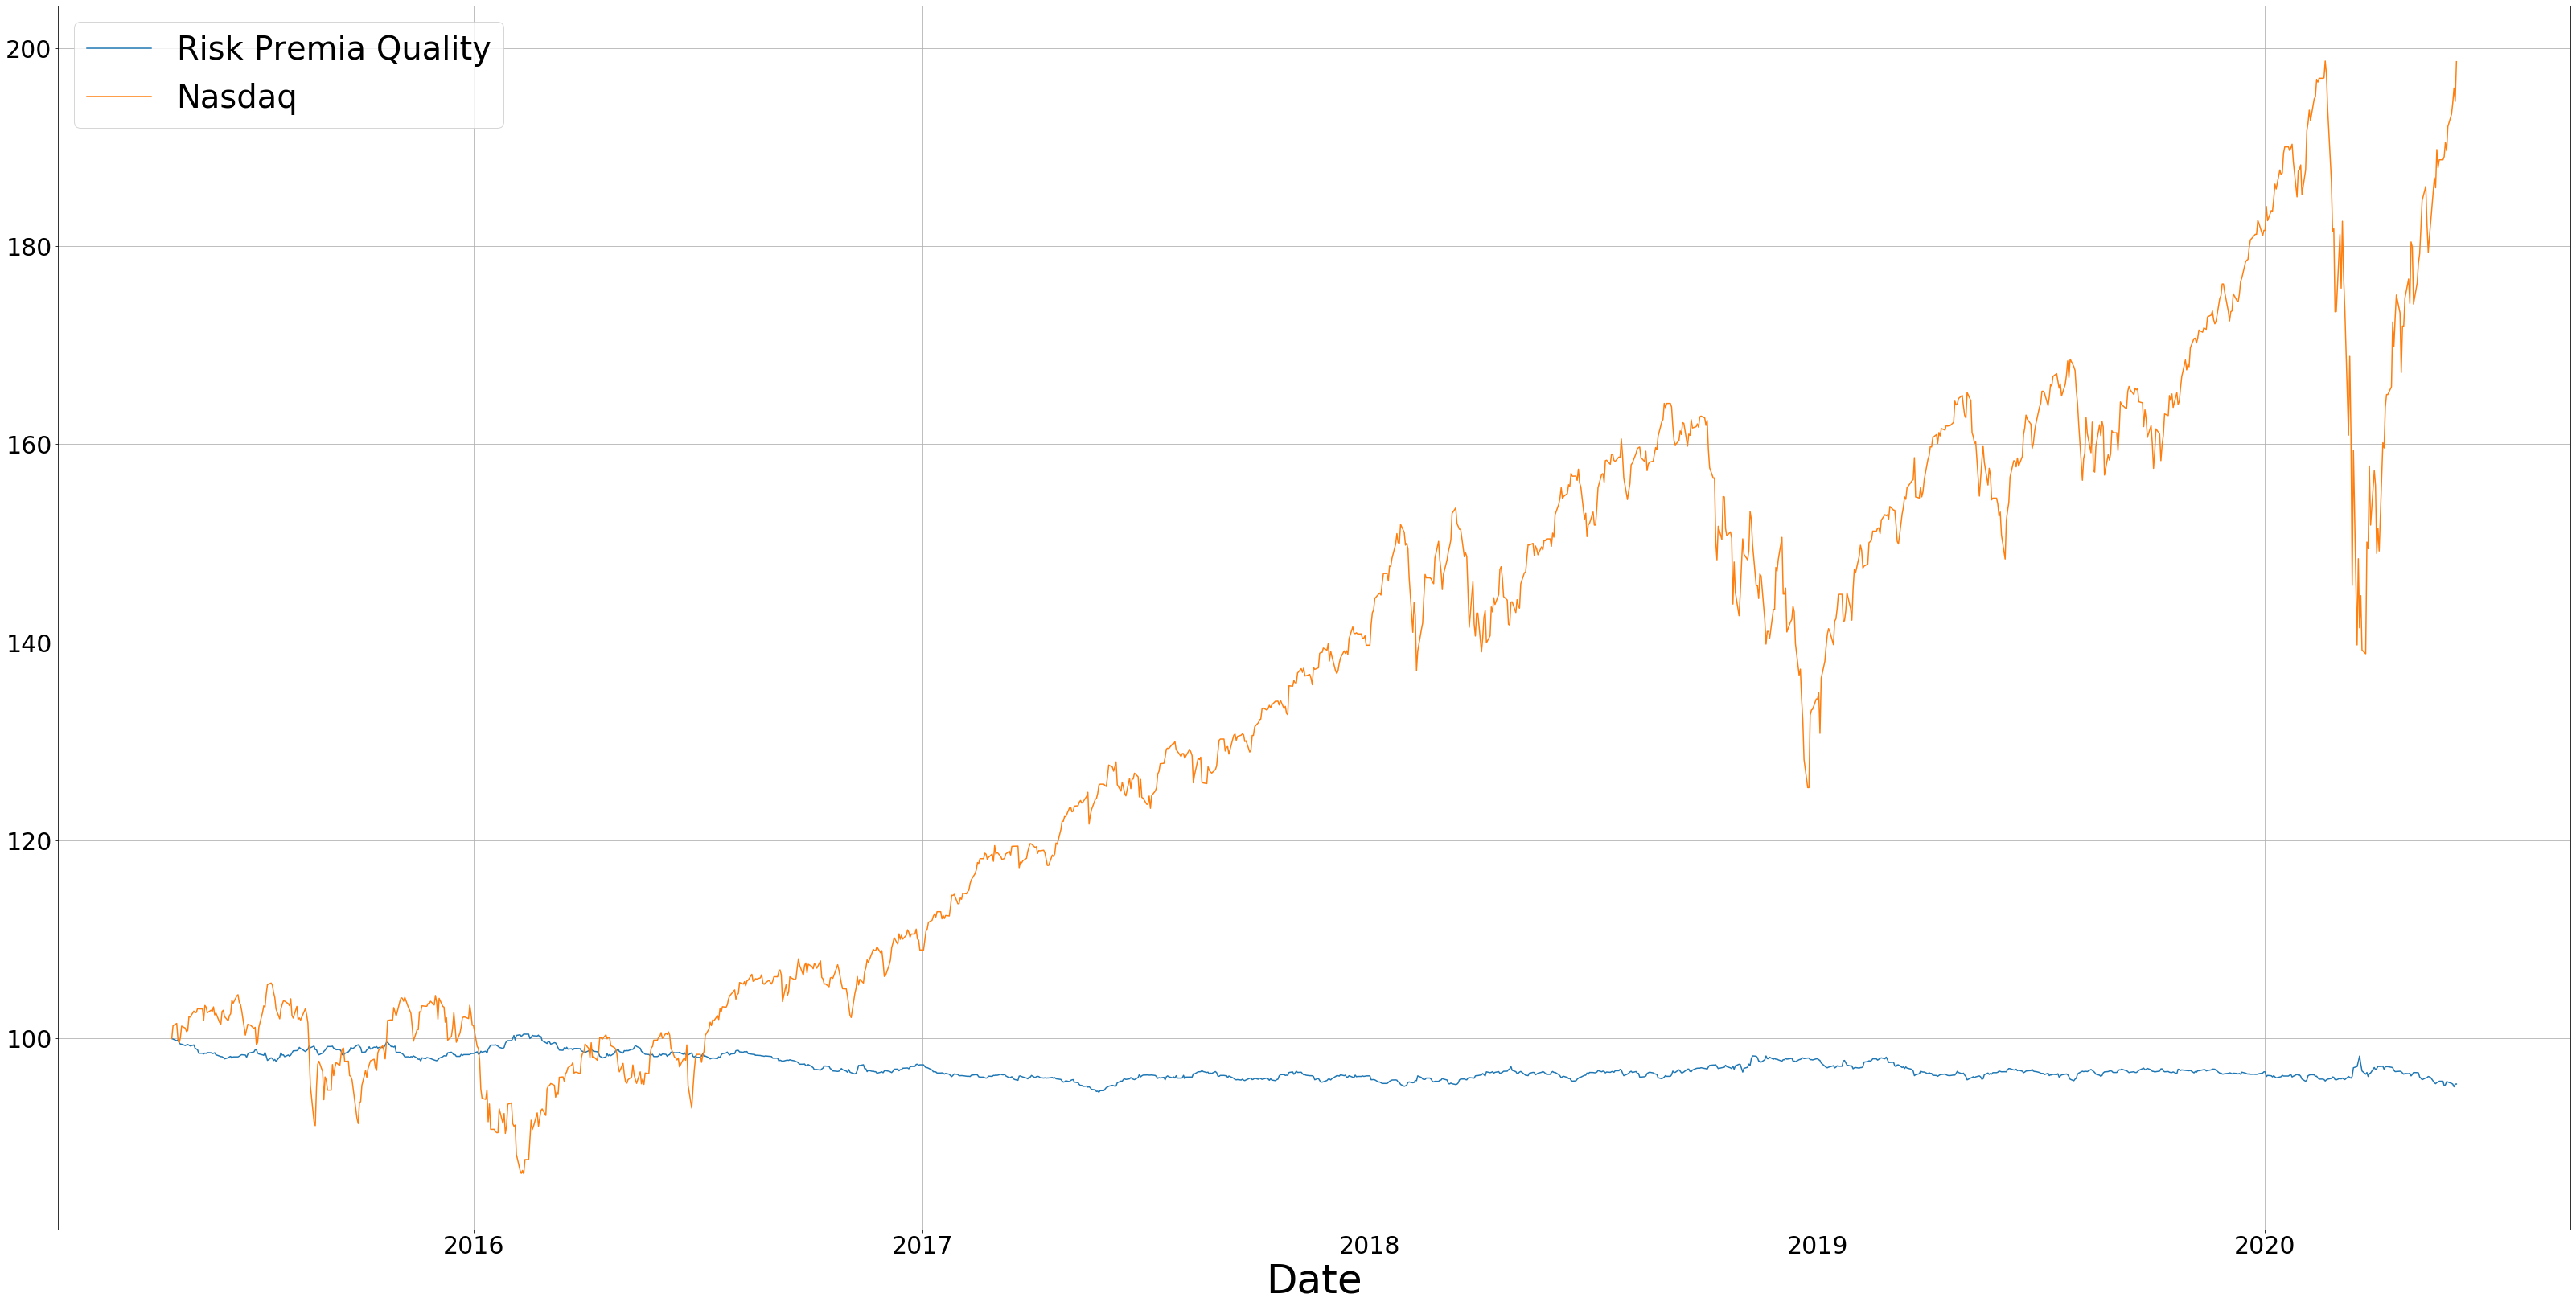

In [111]:
# Grafico la evolucion de las estrategias

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(RPQ["Risk Premia Quality"])
ax1 = plt.plot(nasdaq["Buy&Hold"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Risk Premia Quality", "Nasdaq"],
                 prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

## TO CSV

In [112]:
RPQ.to_csv('./data_resultante/quality_nasdaq.csv')

## CONCLUSIONES

Por momentos la estrategia parece dar mejores resultados que los índices, durante la primera mitad del 2016 en particular. Pero finalmente únicamente logra batir al IBEX35. En gran parte de 2015 y, entre 2017 y finales de 2018 ofrece rentabilidades menores que las de los índices.

Esta estrategia no suele dar buenos resultados en periodos de recuperacion de una crisis de solvencia, puesto que los ratios contables y financieros de las empresas empeoran, de ahí que no logre batir a los índices durante el periodo de tiempo estudiado, ya que este es de recuperación de una crisis precisamente.